# Imports

In [ ]:
import os
import io
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import requests
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Data

In [ ]:
data = requests.get("https://www.statlearning.com/s/College.csv")
dt = pd.read_csv(io.StringIO(data.text))

In [ ]:
dt.columns = dt.columns.str.replace('.', '', regex=False)

In [ ]:
dt.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
dt.shape

(777, 19)

# Elite

In [ ]:
dt['Elite'] = np.where(dt['Top10perc'] > 50, 'Yes', 'No')

In [ ]:
dt.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'FUndergrad', 'PUndergrad', 'Outstate', 'RoomBoard',
       'Books', 'Personal', 'PhD', 'Terminal', 'SFRatio', 'percalumni',
       'Expend', 'GradRate', 'Elite'],
      dtype='object')

In [ ]:
dt.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate,Elite
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


In [ ]:
# convert 'Elite' column to numeric 0 and 1
dt['EliteNum'] = dt['Elite'].map({'Yes': 1, 'No': 0})

In [ ]:
dt.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,...,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate,Elite,EliteNum
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,No,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,No,0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,No,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,Yes,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,No,0


# Logistic Regressions on Elite

Pick two variables from the dataset (other than Top10perc or Top25perc) to perform logistic regressions
on Elite. Fit two models, one for each variable on Elite and report your resulting equation, interpret
the coefficient, and plot the logistic curve. Compare the two models, which is a better predictor in your
opinion.

## Ternimal and EliteNum

In [ ]:
x = dt[['Terminal']]
y = dt['EliteNum']
logreg = LogisticRegression()
logreg.fit(x, y)

logreg.coef_[0][0] #Coef

np.float64(0.18960723965072313)

In [ ]:
logreg.intercept_[0] #Intercept

np.float64(-19.03550056402577)

In [ ]:
m = logreg.coef_[0][0]
b = logreg.intercept_[0]


print(f"beta_0 is {b}.") #intercept
print(f"beta_1 is {m}.") #coef

# log function
def logistic_function(x, m, b):
    return 1 / (1 + np.exp(-(m * x + b)))
xvalues = np.linspace(dt['Terminal'].min(), dt['Terminal'].max(), 300)
yvalues = logistic_function(xvalues, m, b)

beta_0 is -19.03550056402577.
beta_1 is 0.18960723965072313.


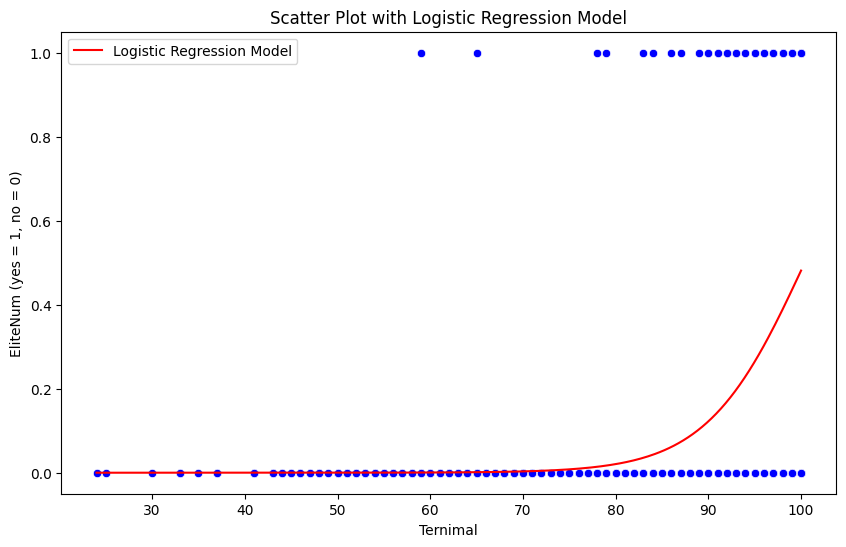

In [ ]:
# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Terminal', y='EliteNum', data=dt, color = 'blue')
plt.xlabel('Ternimal')
plt.ylabel('EliteNum (yes = 1, no = 0)')
plt.title('Scatter Plot with Logistic Regression Model')
plt.plot(xvalues, yvalues, color='red', label='Logistic Regression Model')
plt.legend()
plt.show()

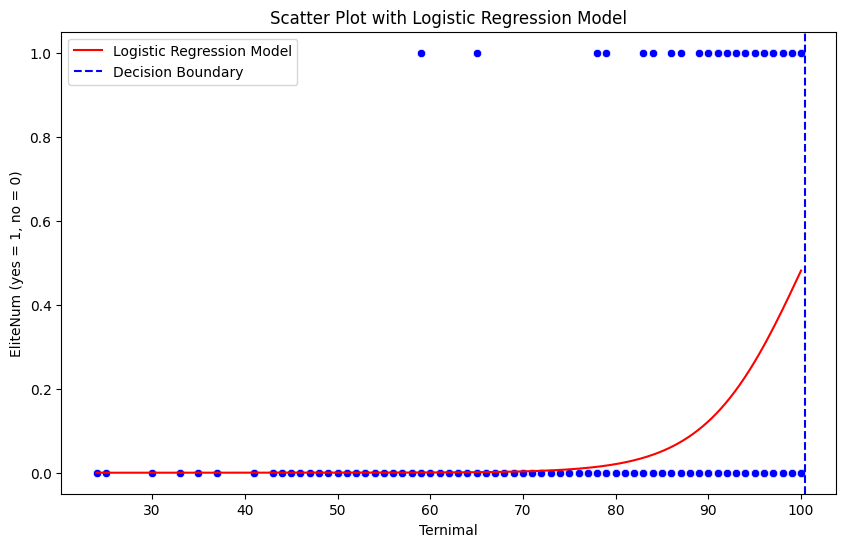

In [ ]:
decision_boundary = -b / m

#plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Terminal', y='EliteNum', data=dt, color = 'blue')
plt.xlabel('Ternimal')
plt.ylabel('EliteNum (yes = 1, no = 0)')
plt.title('Scatter Plot with Logistic Regression Model')

plt.plot(xvalues, yvalues, color='red', label='Logistic Regression Model')

plt.axvline(x=decision_boundary, color='blue', linestyle='--', label='Decision Boundary')

plt.legend()
plt.show()

## Expend and Elite

In [ ]:
x = dt[['Expend']]
y = dt['EliteNum']
logreg = LogisticRegression()
logreg.fit(x, y)

logreg.coef_[0][0] #

np.float64(0.00033193024021222465)

In [ ]:
logreg.intercept_[0]

np.float64(-6.0704379957568335)

In [ ]:
m = logreg.coef_[0][0]
b = logreg.intercept_[0]


print(f"beta_0 is {b}.") #intercept
print(f"beta_1 is {m}.") #coef

def logistic_function(x, m, b):
    return 1 / (1 + np.exp(-(m * x + b)))

xvalues = np.linspace(dt['Expend'].min(), dt['Expend'].max(), 300)
yvalues = logistic_function(xvalues, m, b)

beta_0 is -6.0704379957568335.
beta_1 is 0.00033193024021222465.


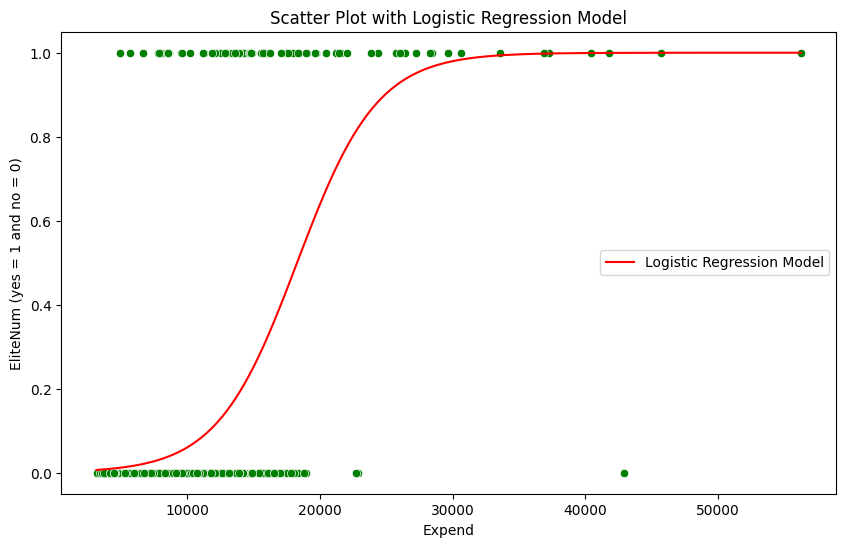

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Expend', y='EliteNum', data=dt, color = 'green')
plt.xlabel('Expend')
plt.ylabel('EliteNum (yes = 1 and no = 0)')
plt.title('Scatter Plot with Logistic Regression Model')
plt.plot(xvalues, yvalues, color='red', label='Logistic Regression Model')
plt.legend()
plt.show()

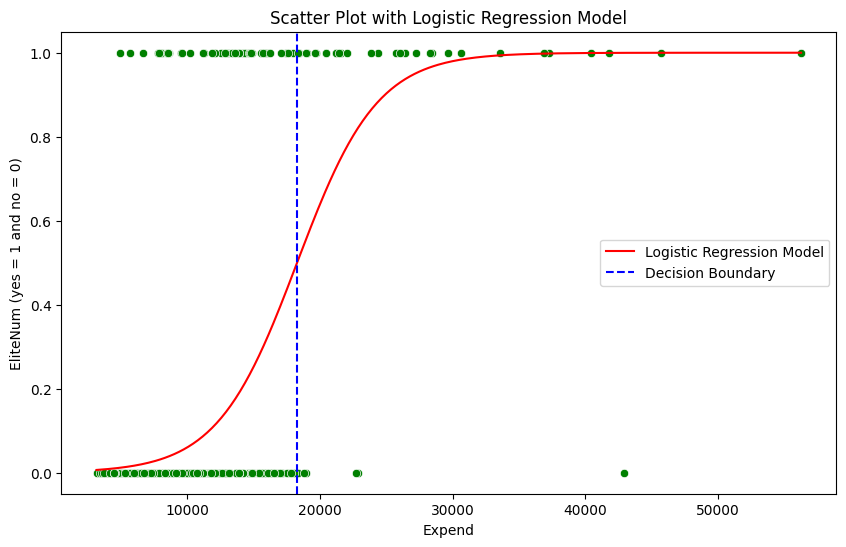

In [ ]:
decision_boundary = -b / m

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Expend', y='EliteNum', data=dt, color = 'green')
plt.xlabel('Expend')
plt.ylabel('EliteNum (yes = 1 and no = 0)')
plt.title('Scatter Plot with Logistic Regression Model')
plt.plot(xvalues, yvalues, color='red', label='Logistic Regression Model')
plt.axvline(x=decision_boundary, color='blue', linestyle='--', label='Decision Boundary')
plt.legend()
plt.show()

In [ ]:
sm.Logit(y, x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.517838
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               EliteNum   No. Observations:                  777
Model:                          Logit   Df Residuals:                      776
Method:                           MLE   Df Model:                            0
Date:                Fri, 02 May 2025   Pseudo R-squ.:                 -0.5888
Time:                        17:07:32   Log-Likelihood:                -402.36
converged:                       True   LL-Null:                       -253.25
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Expend        -0.0001   9.84e-06    -13.919      0.000      -0.000      -0.000
==============================================================================
"""

# percalumni

Select five explanatory variables to possibly predict percalumni with. Perform forward and backward selection with those variables, and report the models that you finish on. Do they give the same model? If they differ, which seems better?

In [ ]:
model1 = smf.ols(formula = 'percalumni ~ Expend', data = dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     163.8
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.67e-34
Time:                        17:10:48   Log-Likelihood:                -2983.3
No. Observations:                 777   AIC:                             5971.
Df Residuals:                     775   BIC:                             5980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1680      0.850     15.485      0.000      11.499      14.837
Expend         0.0010   7.75e-05     12.799      0.000       0.001       0.001
==============================================================================
Omnibus:                       21.794   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.714
Skew:                           0.378   Prob(JB):                     1.93e-05
Kurtosis:                       2.684   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2 = smf.ols(formula = 'percalumni ~ Top10perc', data = dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     202.9
Date:                Fri, 02 May 2025   Prob (F-statistic):           4.63e-41
Time:                        17:10:48   Log-Likelihood:                -2967.4
No. Observations:                 777   AIC:                             5939.
Df Residuals:                     775   BIC:                             5948.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9261      0.735     18.950      0.000      12.484      15.369
Top10perc      0.3200      0.022     14.243      0.000       0.276       0.364
==============================================================================
Omnibus:                       18.355   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.799
Skew:                           0.361   Prob(JB):                     8.28e-05
Kurtosis:                       2.757   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3 = smf.ols(formula = 'percalumni ~ Private', data = dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     161.0
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.16e-33
Time:                        17:10:48   Log-Likelihood:                -2984.4
No. Observations:                 777   AIC:                             5973.
Df Residuals:                     775   BIC:                             5982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.3585      0.775     18.529      0.000      12.837      15.880
Private[T.Yes]    11.5318      0.909     12.690      0.000       9.748      13.316
==============================================================================
Omnibus:                       23.508   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.891
Skew:                           0.434   Prob(JB):                     3.94e-06
Kurtosis:                       3.122   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4 = smf.ols(formula = 'percalumni ~ Terminal', data = dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     59.55
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.67e-14
Time:                        17:10:48   Log-Likelihood:                -3029.0
No. Observations:                 777   AIC:                             6062.
Df Residuals:                     775   BIC:                             6071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8233      2.361      2.042      0.041       0.188       9.459
Terminal       0.2248      0.029      7.717      0.000       0.168       0.282
==============================================================================
Omnibus:                       28.833   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.944
Skew:                           0.456   Prob(JB):                     3.15e-07
Kurtosis:                       2.695   Cond. No.                         447.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model5 = smf.ols(formula = 'percalumni ~ GradRate', data = dt).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     246.1
Date:                Fri, 02 May 2025   Prob (F-statistic):           2.30e-48
Time:                        17:10:48   Log-Likelihood:                -2950.6
No. Observations:                 777   AIC:                             5905.
Df Residuals:                     775   BIC:                             5915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4385      1.528     -0.287      0.774      -3.438       2.561
GradRate       0.3541      0.023     15.686      0.000       0.310       0.398
==============================================================================
Omnibus:                       35.189   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.779
Skew:                           0.529   Prob(JB):                     3.80e-09
Kurtosis:                       3.279   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Forward Selection

In [ ]:
model_f1 = smf.ols(formula = 'percalumni ~ Expend + Top10perc', data = dt).fit()
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     116.7
Date:                Fri, 02 May 2025   Prob (F-statistic):           5.18e-45
Time:                        17:10:48   Log-Likelihood:                -2955.4
No. Observations:                 777   AIC:                             5917.
Df Residuals:                     774   BIC:                             5931.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8275      0.840     14.085      0.000      10.179      13.476
Expend         0.0005   9.96e-05      4.934      0.000       0.000       0.001
Top10perc      0.2238      0.029      7.588      0.000       0.166       0.282
==============================================================================
Omnibus:                       21.288   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.805
Skew:                           0.364   Prob(JB):                     3.04e-05
Kurtosis:                       2.664   Cond. No.                     2.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_f2 = smf.ols(formula = 'percalumni ~ Expend + Top10perc + Private', data = dt).fit()
model_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     129.2
Date:                Fri, 02 May 2025   Prob (F-statistic):           7.96e-68
Time:                        17:10:48   Log-Likelihood:                -2899.9
No. Observations:                 777   AIC:                             5808.
Df Residuals:                     773   BIC:                             5826.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.0792      0.896      7.905      0.000       5.321       8.837
Private[T.Yes]     9.2050      0.845     10.895      0.000       7.547      10.864
Expend             0.0003   9.48e-05      2.979      0.003    9.63e-05       0.000
Top10perc          0.2265      0.027      8.245      0.000       0.173       0.280
==============================================================================
Omnibus:                        9.682   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.797
Skew:                           0.258   Prob(JB):                      0.00746
Kurtosis:                       2.811   Cond. No.                     3.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_f3 = smf.ols(formula = 'percalumni ~ Expend + Top10perc + Private + Terminal', data = dt).fit()
model_f3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     103.3
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.89e-70
Time:                        17:10:48   Log-Likelihood:                -2891.2
No. Observations:                 777   AIC:                             5792.
Df Residuals:                     772   BIC:                             5816.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6639      2.276     -0.731      0.465      -6.131       2.803
Private[T.Yes]    10.2636      0.874     11.747      0.000       8.548      11.979
Expend             0.0002   9.65e-05      1.940      0.053   -2.21e-06       0.000
Top10perc          0.1898      0.029      6.642      0.000       0.134       0.246
Terminal           0.1243      0.030      4.171      0.000       0.066       0.183
==============================================================================
Omnibus:                       10.414   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.585
Skew:                           0.271   Prob(JB):                      0.00503
Kurtosis:                       2.818   Cond. No.                     7.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_f4 = smf.ols(formula = 'percalumni ~ Expend + Top10perc + Private + Terminal + GradRate', data = dt).fit()
model_f4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     97.09
Date:                Fri, 02 May 2025   Prob (F-statistic):           2.40e-79
Time:                        17:10:49   Log-Likelihood:                -2868.0
No. Observations:                 777   AIC:                             5748.
Df Residuals:                     771   BIC:                             5776.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.4619      2.365     -3.155      0.002     -12.105      -2.819
Private[T.Yes]     8.3449      0.893      9.344      0.000       6.592      10.098
Expend             0.0002   9.38e-05      1.962      0.050   -1.13e-07       0.000
Top10perc          0.1276      0.029      4.373      0.000       0.070       0.185
Terminal           0.0962      0.029      3.291      0.001       0.039       0.154
GradRate           0.1708      0.025      6.887      0.000       0.122       0.219
==============================================================================
Omnibus:                       18.115   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.783
Skew:                           0.376   Prob(JB):                     8.34e-05
Kurtosis:                       3.117   Cond. No.                     7.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Backward Selection

In [ ]:
model_b1 = smf.ols(formula = 'percalumni ~ Top10perc + Private + Terminal + GradRate', data = dt).fit()
model_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percalumni   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     120.0
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.39e-79
Time:                        17:10:49   Log-Likelihood:                -2870.0
No. Observations:                 777   AIC:                             5750.
Df Residuals:                     772   BIC:                             5773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.8647      2.361     -3.332      0.001     -12.498      -3.231
Private[T.Yes]     8.7698      0.868     10.103      0.000       7.066      10.474
Top10perc          0.1563      0.025      6.170      0.000       0.107       0.206
Terminal           0.1095      0.028      3.847      0.000       0.054       0.165
GradRate           0.1710      0.025      6.885      0.000       0.122       0.220
==============================================================================
Omnibus:                       18.029   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.670
Skew:                           0.374   Prob(JB):                     8.83e-05
Kurtosis:                       3.131   Cond. No.                         737.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No need to eliminate more since all p-values are close to 0